In [3]:
import pandas as pd
from datetime import datetime
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer,MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import classification_report
import numpy as np
import seaborn as sns
import joblib

In [4]:
data1=pd.read_excel('C:/Users/Harsh/Desktop/trainer/data/Cauvery.xlsx')

In [11]:
for i in range(1,len(data1.columns)):
    data1[data1.columns[i]] = data1[data1.columns[i]].fillna(data1[data1.columns[i]].mean())
# In[6]:
data1.describe()
# In[7]:
y=data1['Flood']
# In[8]:
for i in range(len(y)):
    if(y[i] >= 0.1):
        y[i]=1
# In[9]:

y=pd.DataFrame(y)

data1.drop('Flood',axis=1,inplace=True)


C:\Users\Harsh\AppData\Local\Temp\ipykernel_15092\3784660226.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=1
C:\Users\Harsh\AppData\Local\Temp\ipykernel_15092\3784660226.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=1
C:\Users\Harsh\AppData\Local\Temp\ipykernel_15092\3784660226.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[i]=1
C:\Users\Harsh\AppData\Local\Temp\ipykernel_15092\3784660226.py:10: SettingW

In [12]:
data1.shape
# In[5]:

#Fillng null entries with mean of their respective columns
for i in range(1,len(data1.columns)):
    data1[data1.columns[i]] = data1[data1.columns[i]].fillna(data1[data1.columns[i]].mean())
# In[6]:
data1.describe()

,Day,Months,Year,Discharge,flood runoff,daily runoff,weekly runoff
count,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000
mean,15.729205,6.523077,2008.000000,1034.134605,0.090742,1.124983,7.878950
std,8.800483,3.448888,6.055444,796.380915,1.049376,0.947349,6.504503
min,1.000000,1.000000,1998.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,4.000000,2003.000000,451.000000,0.000000,0.460000,3.310000
50%,16.000000,7.000000,2008.000000,802.000000,0.000000,0.810000,5.690000
75%,23.000000,10.000000,2013.000000,1315.750000,0.000000,1.507500,10.400000
max,31.000000,12.000000,2018.000000,5169.000000,24.040000,5.920000,38.090000


In [13]:
d1=pd.DataFrame()
d1["Day"]=data1['Date']
d1['Months']=data1['Date']
d1['Year']=data1['Date']
data1['Date']=pd.to_datetime(data1['Date'])
d1["Year"]=data1.Date.dt.year
d1["Months"]=data1.Date.dt.month
d1["Day"]=data1.Date.dt.day


KeyError: 'Date'

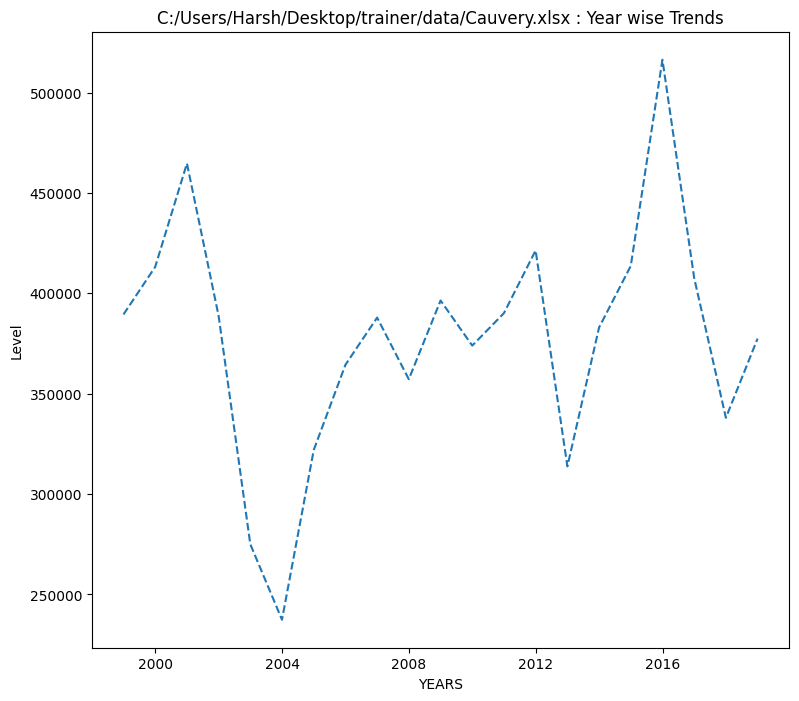

In [8]:
dx=pd.DataFrame()
dx['Date']=data1['Date']
dx['Discharge']=data1['Discharge']
dx=dx.set_index(['Date'])
yearly = dx.resample('Y').sum()

plt.figure(figsize=(9,8))
plt.xlabel('YEARS')
plt.ylabel('Level')
plt.title('C:/Users/Harsh/Desktop/trainer/data/Cauvery.xlsx'+" : Year wise Trends")
plt.plot(yearly,'--')

In [9]:
data1.drop('Date',inplace=True,axis=1)

In [10]:
data1=pd.concat([d1,data1],axis=1)
data1.head()

#-----------------------for taking data upto 2015 as training and rest for testing------------------------------------------------
locate=0;
for i in range(len(data1["Day"])):
    if(data1["Day"][i]==31 and data1["Months"][i]==12 and data1["Year"][i]==2015):
        locate=i;
        break;
        
i=locate+1
print(i)

x_train=data1.iloc[0:i,:]
y_train=y.iloc[0:i]
x_test=data1.iloc[i:,:]
y_test=y.iloc[i:]

6574


NameError: name 'y' is not defined